# Better Policing Project

- Submitted By : Ashitosh Phadatare
- Institute 	 : National Insititute of Technology Karnataka , Surathkal (NITK)
- Course		 : Bachelors in Technology (BTech)
- Branch	     : Artificial Intelligence





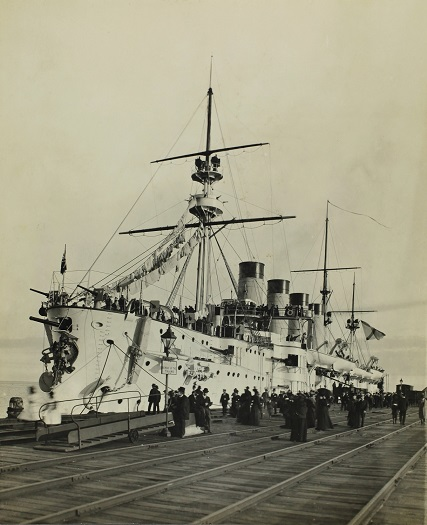

## Problem Statement

Using the Kaggle Titanic dataset, create a model that predicts which passengers survived the Titanic shipwreck. Use the Kaggle platform for automated evaluation, and sent the link of your notebook

## Importing the necessary Libraries Needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

## Data Collection and PreProcessing

In [2]:
tnt_data = pd.read_csv('train.csv')

In [3]:
tnt_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
tnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see from the info that there are 891 rows and 12 columns out of which 3 columns have Nan values

In [5]:
tnt_data.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

The above information shows percentage of NaN values in the dataset by columns names:
- Age has 19% NaN values
- Cabin has 77 % NaN values 
- Embarked has 0.22 % NaN values

In [6]:
tnt_data.shape

(891, 12)

### Replacing the NaN values using Imputation(Mean , Median and Mode ) for categorical Data

Since the Cabin values have 77% NaN values, its better to drop the column as a whole so that there are less discrepency in the dataset.

In [7]:
#handling the missing values
tnt_data = tnt_data.drop(columns = 'Cabin' , axis = 1)

In [8]:
#replaceing age nan with mean values
tnt_data['Age'].fillna(tnt_data['Age'].mean() , inplace = True)

In [9]:
tnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
#finding the mode of the embarked column
val = tnt_data['Embarked'].mode()
tnt_data['Embarked'].fillna(tnt_data['Embarked'].mode()[0] , inplace  = True)

In [11]:
tnt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [12]:
tnt_data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,S
92,93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.1750,S
544,545,0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,S
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.5000,S
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,S
662,663,0,1,"Colley, Mr. Edward Pomeroy",male,47.0,0,0,5727,25.5875,S
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,Q


## Data analysis

In [13]:
tnt_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
tnt_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Here :
- 1 : Survived Passengers
- 0 : Died Passengers

In [40]:
sns.set()

<AxesSubplot: xlabel='Survived', ylabel='count'>

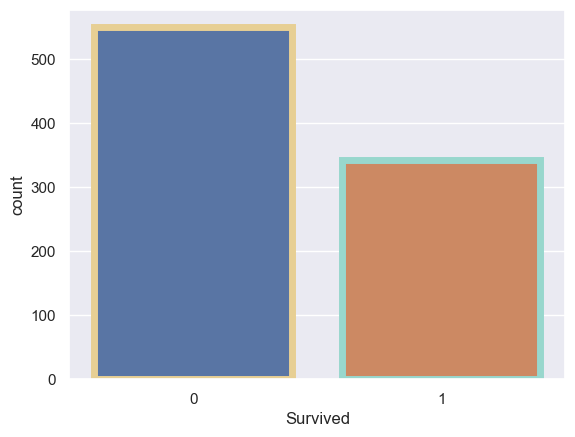

In [41]:
sns.countplot(x ="Survived" , data=tnt_data ,linewidth=5,
                   edgecolor=sns.color_palette("BrBG", 2) )


From the above plot we can infer that there were more no of Deaths than Survivals in the Titanic Accident

<AxesSubplot: xlabel='Sex', ylabel='count'>

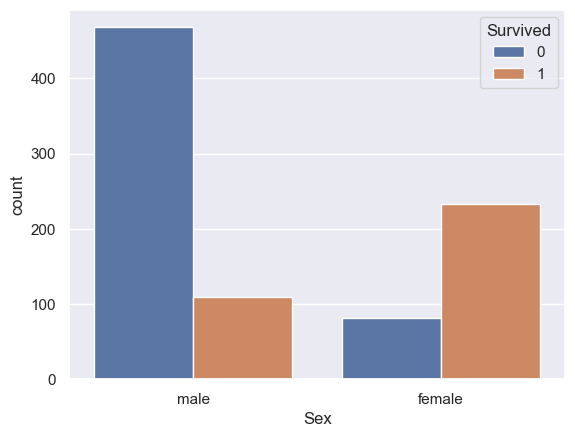

In [17]:
sns.countplot(x ='Sex' , hue = "Survived" , data=tnt_data)

From the above plot we can infer that more men died as compared to women, we can make out from the understanding that women were given priority for evacuation than men

<AxesSubplot: xlabel='Pclass', ylabel='count'>

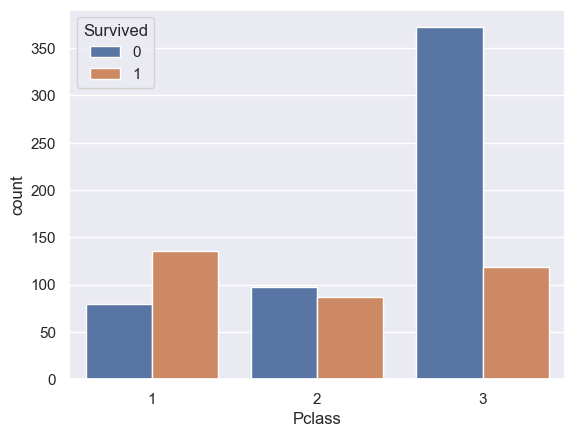

In [42]:
sns.countplot(x ='Pclass' , hue = "Survived" , data=tnt_data)

From the above plot we can infer that Class 3 passengers were given the least pritority than Class2 and Class1 passenger as more no of deaths are reported in Class3 Passengers

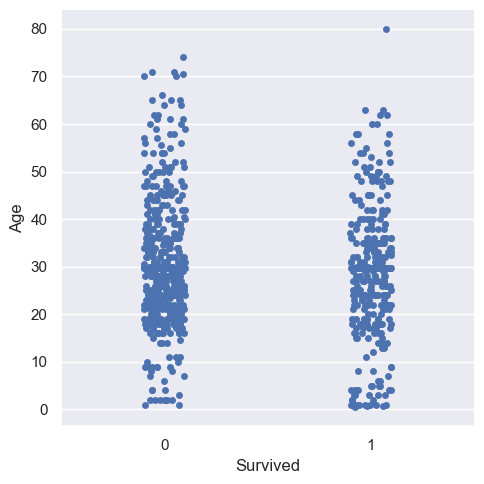

In [43]:
sns.catplot(data=tnt_data, y="Age", x="Survived")

### Encoding the categorical columns

In [20]:
tnt_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
tnt_data.replace({"Sex" : {'male' : 1 , 'female' : 0 } , "Embarked" : {"S" : 0 , "C" : 1 , "Q" : 2}} , inplace = True)

### Separating features and target

In [22]:
X = tnt_data.drop(columns = ["Name" , "PassengerId" , "Ticket" , "Survived" ] , axis = 1)
Y = tnt_data["Survived"]

In [23]:
X.shape

(891, 7)

In [24]:
Y.shape

(891,)

In [25]:
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2 , random_state = 2)

In [26]:
print(X.shape ,x_train.shape , x_test.shape)

(891, 7) (712, 7) (179, 7)


In [27]:
print(Y.shape ,y_train.shape , y_test.shape)

(891,) (712,) (179,)


## Model Training - Linear Regression

In [44]:
model = LogisticRegression()

In [45]:
model.fit(x_train , y_train)

C:\Pyhton37\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## evaluating our model

In [46]:
#Accuracy on Training data
x_train_pred = model.predict(x_train)

In [47]:
x_train_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [48]:
traindata_acc = accuracy_score(y_train , x_train_pred)

In [54]:
print(f"Accuracy on Training data = {(traindata_acc*100).round(4)}%")

Accuracy on Training data = 81.1798%


In [34]:
#Accuracy on test data
x_test_pred = model.predict(x_test)

In [35]:
x_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [36]:
testData_acc = accuracy_score( y_test , x_test_pred )

In [55]:
print(f"Accuracy on Training data = {(testData_acc*100).round(4)}%")

Accuracy on Training data = 78.2123%


### Confusion Matrix for Train data and Test Data

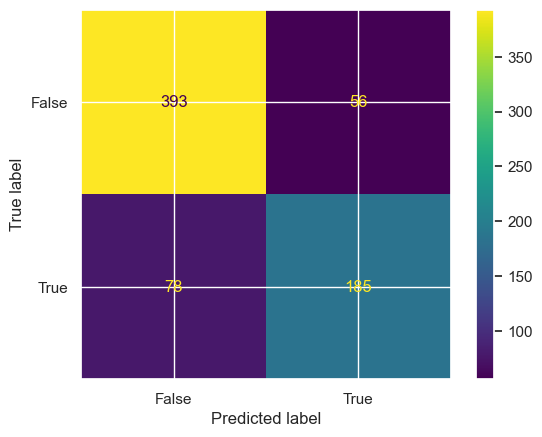

In [56]:
confusion_matrix = metrics.confusion_matrix(y_train , x_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


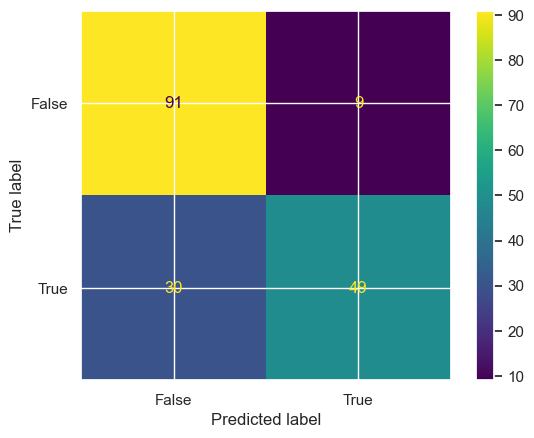

In [57]:
confusion_matrix = metrics.confusion_matrix(y_test , x_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()


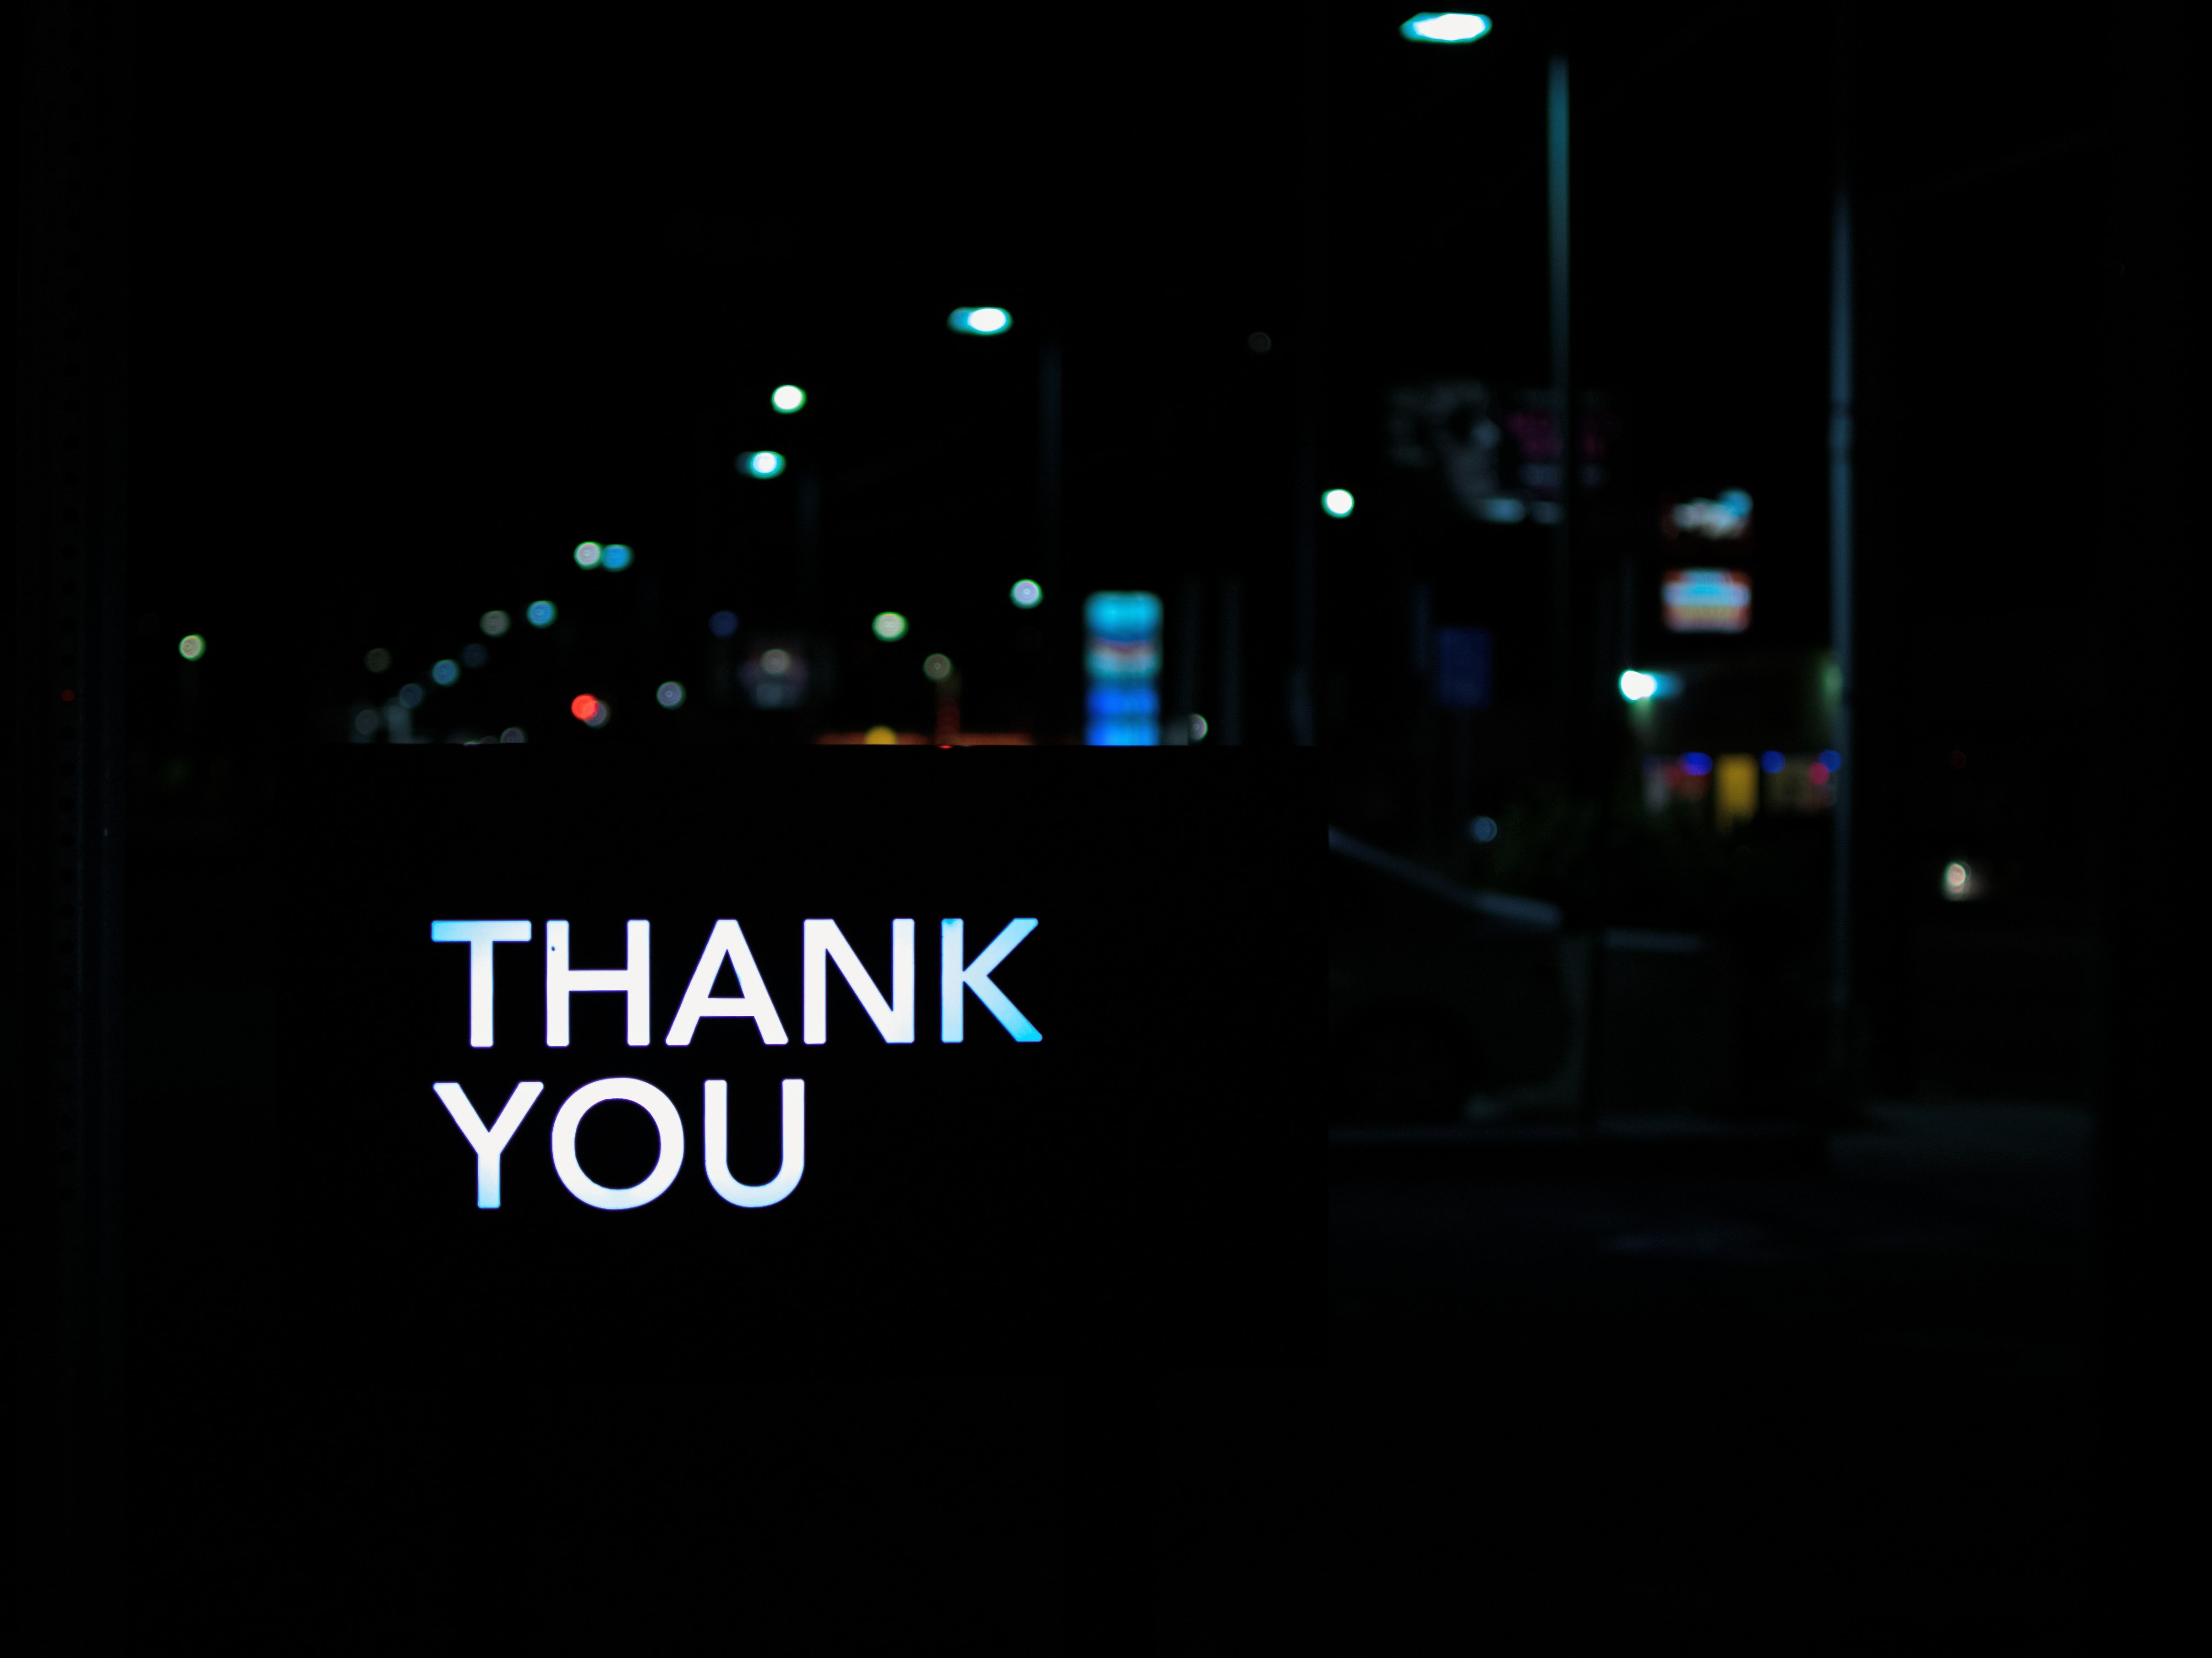